In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, Rescaling, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
tf.__version__

'2.19.0'

In [2]:
SEED = 42
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

In [3]:
train_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
val_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
test_dataset = image_dataset_from_directory(
    "dogandcat/test_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.
Found 2023 files belonging to 2 classes.


In [4]:
class_names = train_dataset.class_names
print(f"Classes: {class_names}")

Classes: ['cats', 'dogs']


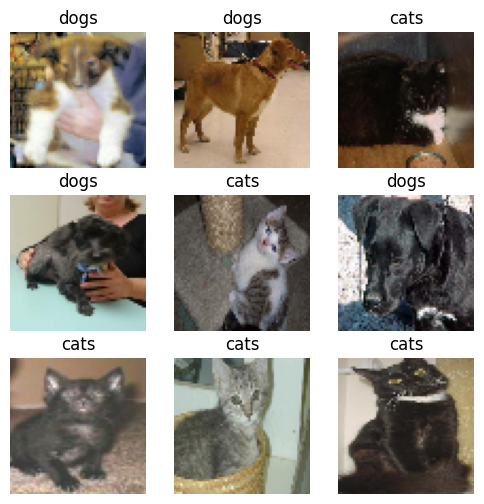

In [5]:
plt.figure(figsize=(6, 6))

for images, labels in train_dataset.take(2):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [6]:
model = Sequential([
    Input(shape=(64, 64, 3)),

    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2),

    Rescaling(1./255),

    Conv2D(filters = 32, kernel_size=(3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 64, kernel_size=(3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 64, kernel_size=(3,3), activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2)),

    Dropout(.4),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(.3),
    Dense(128, activation="relu"),
    Dropout(.3),
    Dense(64, activation="relu"),
    Dropout(.2),
    Dense(1, activation='sigmoid'),

])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 64, 64, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,25

 Total params: 688,257 (2.63 MB)

 Trainable params: 687,937 (2.62 MB)

 Non-trainable params: 320 (1.25 KB)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
history = model.fit(x = train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5418 - loss: 0.8238 - val_accuracy: 0.4978 - val_loss: 0.9290
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5658 - loss: 0.7025 - val_accuracy: 0.5797 - val_loss: 0.6661
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5833 - loss: 0.6769 - val_accuracy: 0.6322 - val_loss: 0.6385
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.6236 - loss: 0.6446 - val_accuracy: 0.6032 - val_loss: 0.6543
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6338 - loss: 0.6362 - val_accuracy: 0.5472 - val_loss: 0.7744
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6460 - loss: 0.6228 - val_accuracy: 0.6047 - val_loss: 0.6593
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6633 - loss: 0.6059 - val_accuracy: 0.5347 - val_loss: 0.7010
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6859 - loss: 0.5908 - va

In [11]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validaiton Accuracy: {accuracy:.4f}")
loss, accuracy = model.evaluate(train_dataset)
print(f"Train Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7914 - loss: 0.4529
Validaiton Accuracy: 0.8111
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8393 - loss: 0.3648
Train Accuracy: 0.8388


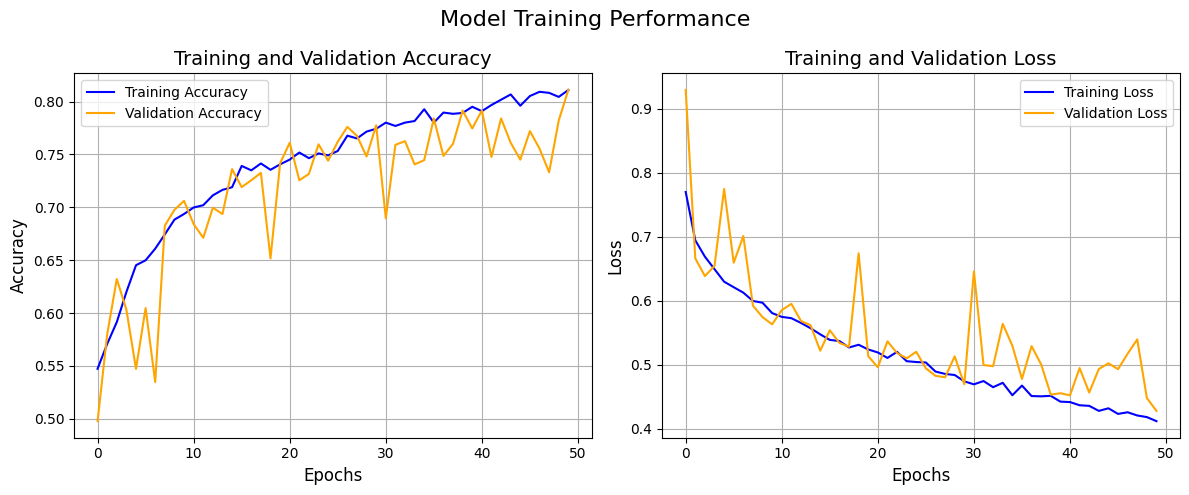

In [12]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8152 - loss: 0.4172
Test Accuracy: 0.8033


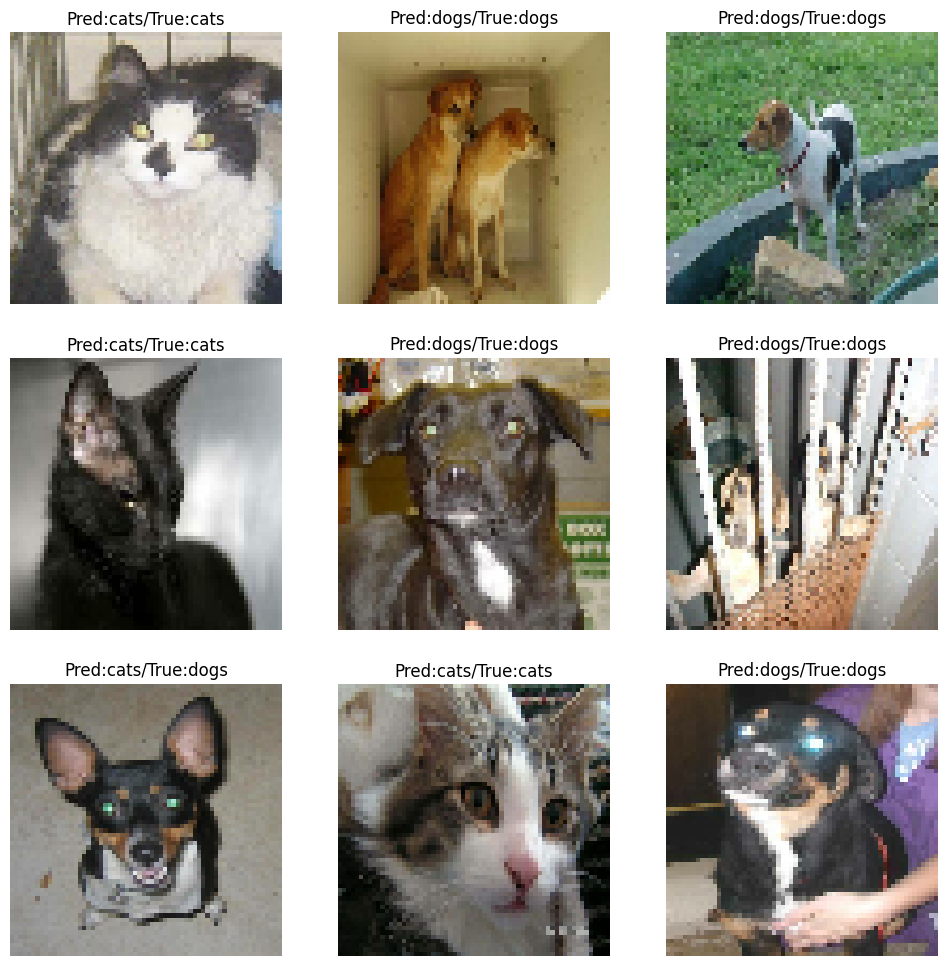

In [14]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # prepocess photo
        img_x = tf.expand_dims(images[i], axis=0)  # Добавляем batch dimension
        
        # predict
        result = model.predict(img_x, verbose=False)
        prediction = class_names[0 if result[0][0] < 0.5 else 1]
        
        plt.title(f"Pred:{prediction}/True:{class_names[labels[i]]}")
        plt.axis("off")

plt.show()